## DATA VISUALIZATION

This notebook collects plots and diagrams summarizing main outcomes from previous hourly price analysis

### IMPORT LIBRARIES AND FILES

In [4]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [7]:
# Pickle files

saved_session_dir = '../saved_session/'
persistence_model_results = 'persistence_results.pkl'
lstm_model_results = 'lstm_results.pkl'

In [20]:
# Load Pickle files

with open(saved_session_dir + persistence_model_results, 'rb') as handle:
    persistence_model_df = pickle.load(handle)
    
with open(saved_session_dir + lstm_model_results, 'rb') as handle:
    lstm_model_df = pickle.load(handle)

### PREPROCESSING

* Remove lag time / hours ahead columns, they are no longer required
* Rename rmse/mae columns to recognize which model they belong to
* Merge in a single dataframe

In [21]:
# Preview
persistence_model_df.head()

,hour ahead,mae,rmse
0,1,4.764139,10.955056
1,2,8.609175,17.238015
2,3,11.787077,21.827930
3,4,14.331333,25.125178
4,5,16.256312,27.389440


In [22]:
lstm_model_df.head()

,lag,rmse,mae
0,0,11.837159,4.340716
1,1,9.916233,3.991398
2,2,12.104911,5.798496
3,3,15.397185,8.228225
4,4,17.348745,9.715158


In [23]:
# Drop time column and merge dataframes on Index

lstm_model_df.drop('lag',axis=1,inplace=True)
lstm_model_df.columns = ['lstm_rmse','lstm_mae']
persistence_model_df.drop('hour ahead',axis=1,inplace=True)
persistence_model_df.columns = ['persistence_mae','persistence_rmse']

results_df = pd.concat([persistence_model_df,lstm_model_df], axis = 1)
results_df.head()

,persistence_mae,persistence_rmse,lstm_rmse,lstm_mae
0,4.764139,10.955056,11.837159,4.340716
1,8.609175,17.238015,9.916233,3.991398
2,11.787077,21.827930,12.104911,5.798496
3,14.331333,25.125178,15.397185,8.228225
4,16.256312,27.389440,17.348745,9.715158


### PLOT RESULTS

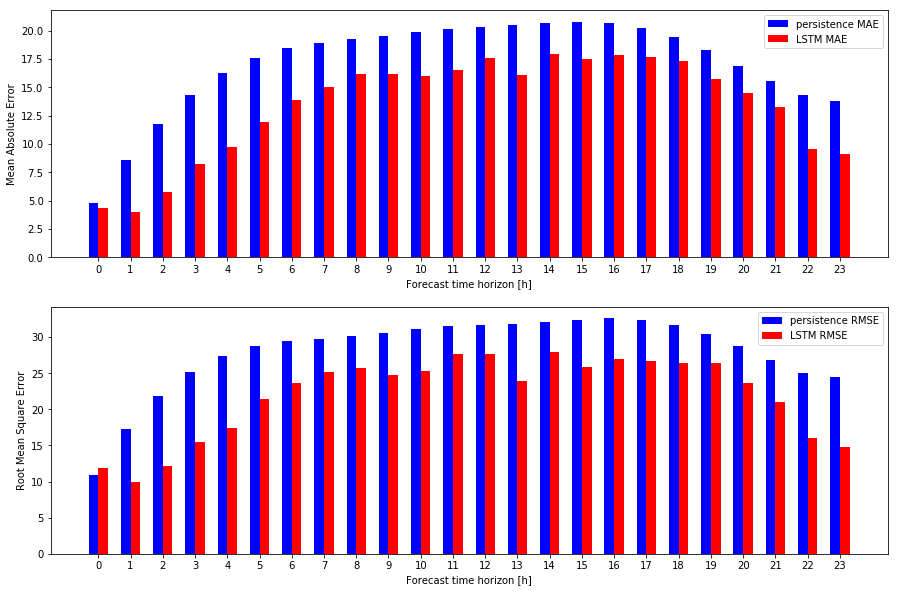

In [44]:
bar_width = 0.3
bar_shift = 0.15


f, ax = plt.subplots(2,1,figsize=(15,10))

ax[0].bar(results_df.index-bar_shift, results_df.persistence_mae, width=bar_width, color='b', align='center')
ax[0].bar(results_df.index+bar_shift, results_df.lstm_mae, width=bar_width, color='r', align='center')
ax[0].legend(['persistence MAE','LSTM MAE'])
ax[0].set_xticks(range(results_df.shape[0]))
ax[0].set_xlabel('Forecast time horizon [h]')
ax[0].set_ylabel('Mean Absolute Error')

ax[1].bar(results_df.index-bar_shift, results_df.persistence_rmse, width=bar_width, color='b', align='center')
ax[1].bar(results_df.index+bar_shift, results_df.lstm_rmse, width=bar_width, color='r', align='center')
ax[1].legend(['persistence RMSE','LSTM RMSE'])
ax[1].set_xticks(range(results_df.shape[0]))
ax[1].set_xlabel('Forecast time horizon [h]')
ax[1].set_ylabel('Root Mean Square Error')

plt.show()